In [1]:
import pandas as pd,seaborn as sns,matplotlib.pyplot as plt,numpy as np

In [2]:
data = pd.read_csv('train.csv.xls')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<AxesSubplot: >

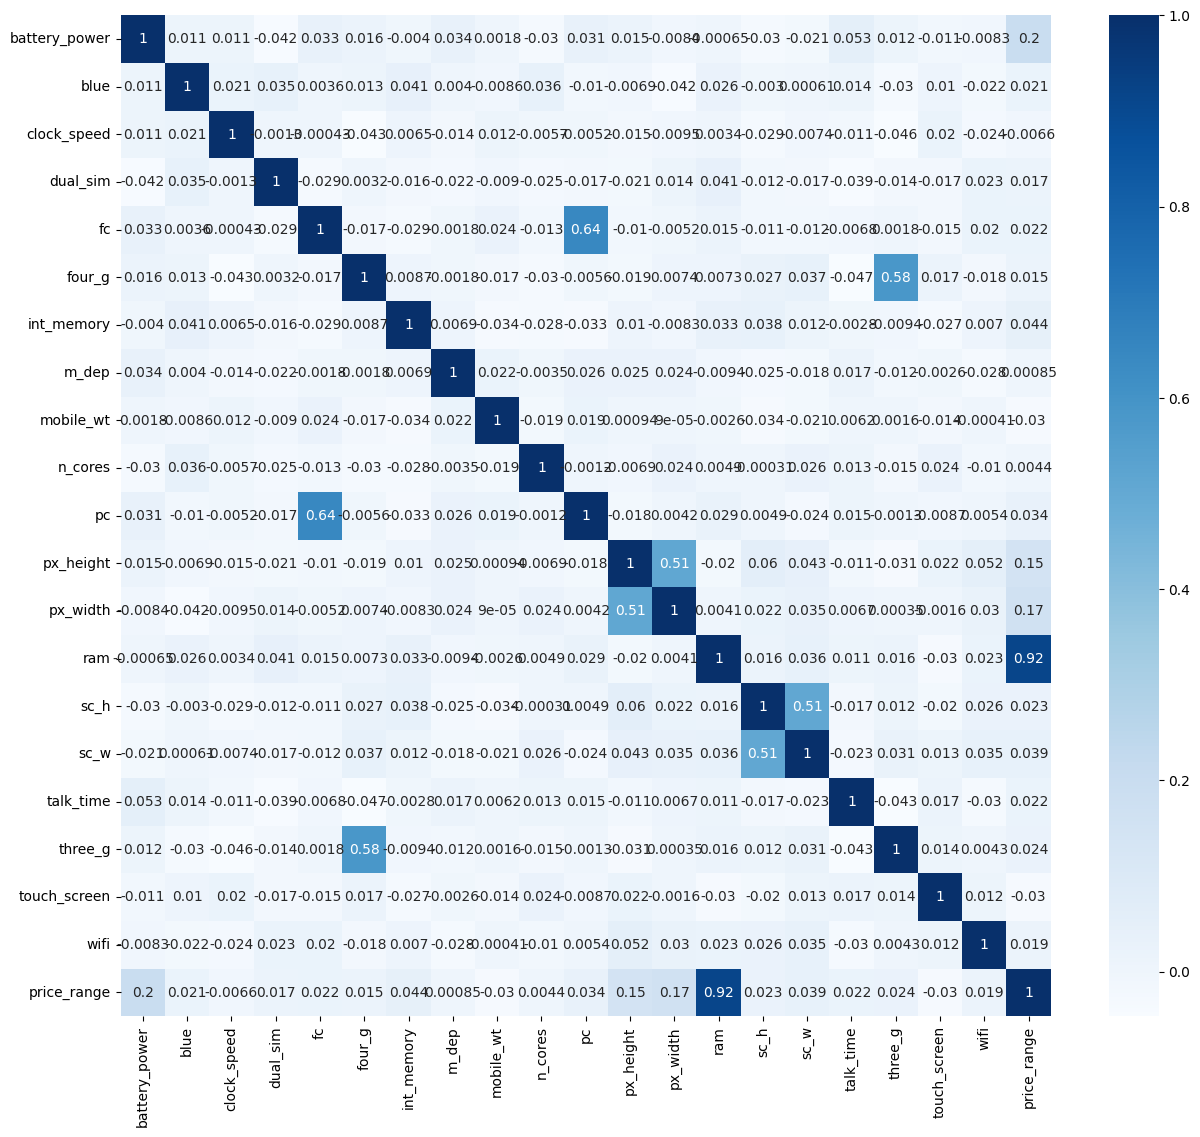

In [5]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr(),cmap=plt.cm.Blues,annot=True)

In [6]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif?

In [7]:
mut_info = mutual_info_classif(data.drop('price_range',axis=1),data.price_range)

In [8]:
corr_df = pd.DataFrame(mut_info)
corr_df.index= data.drop('price_range',axis=1).columns

In [9]:
corr_df.sort_values(0,ascending=False)

,0
ram,0.849517
int_memory,0.034643
m_dep,0.029406
px_height,0.029261
px_width,0.027353
battery_power,0.022592
talk_time,0.018031
pc,0.014737
three_g,0.007308
wifi,0.007053


In [12]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [10]:
df = data.drop(list(corr_df[corr_df[0]<0.0001].index),axis=1)

In [42]:
from sklearn.preprocessing import MinMaxScaler

column_names = X.columns
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X,columns=column_names)

In [43]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,_y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
x_train

,battery_power,dual_sim,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,talk_time,three_g,wifi
836,0.267869,1.0,0.983871,0.666667,0.350000,0.70,0.185714,0.574099,0.908071,0.928571,0.722222,0.0,1.0
575,0.464930,1.0,0.290323,0.000000,0.408333,0.50,0.109184,0.807744,0.702565,1.000000,0.666667,1.0,1.0
557,0.680027,0.0,0.483871,0.666667,1.000000,0.50,0.085714,0.493324,0.709781,0.428571,0.722222,1.0,0.0
1235,0.981964,1.0,0.612903,0.222222,0.883333,0.95,0.247449,0.281709,0.084180,0.214286,0.833333,1.0,0.0
1360,0.254509,1.0,0.419355,0.111111,0.591667,0.80,0.126531,0.256342,0.132282,1.000000,0.333333,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.984636,1.0,0.467742,0.888889,0.591667,0.85,0.395408,0.738985,0.739177,0.571429,0.944444,0.0,1.0
1294,0.058784,0.0,0.919355,0.666667,0.550000,0.20,0.387245,0.906542,0.028327,0.785714,0.222222,1.0,1.0
860,0.887108,0.0,0.209677,0.333333,0.666667,0.35,0.371939,0.512016,0.487440,0.785714,0.555556,1.0,1.0
1459,0.952572,1.0,0.145161,0.333333,0.916667,0.60,0.250510,0.671562,0.710850,0.785714,0.888889,0.0,1.0


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
sklearn_models = dict(
    rf_model = RandomForestClassifier(),
    lr_model = LogisticRegression(),
    cb_model = CatBoostClassifier(),
    lgbm_model = LGBMClassifier(),
    knn_model = KNeighborsClassifier(),
    nn_model = MLPClassifier()
) 

In [22]:
for model in sklearn_models.values():
    model.fit(x_train,y_train)

Learning rate set to 0.080496
0:	learn: 1.2826233	total: 59.3ms	remaining: 59.3s
1:	learn: 1.1861504	total: 62ms	remaining: 30.9s
2:	learn: 1.1035654	total: 64.3ms	remaining: 21.4s
3:	learn: 1.0373668	total: 66.9ms	remaining: 16.7s
4:	learn: 0.9802965	total: 69.2ms	remaining: 13.8s
5:	learn: 0.9340448	total: 71.1ms	remaining: 11.8s
6:	learn: 0.8850523	total: 73.1ms	remaining: 10.4s
7:	learn: 0.8446546	total: 75.1ms	remaining: 9.32s
8:	learn: 0.7995464	total: 77.2ms	remaining: 8.51s
9:	learn: 0.7642966	total: 79.4ms	remaining: 7.86s
10:	learn: 0.7227480	total: 81.5ms	remaining: 7.32s
11:	learn: 0.7001664	total: 83.4ms	remaining: 6.87s
12:	learn: 0.6716792	total: 85.5ms	remaining: 6.49s
13:	learn: 0.6449843	total: 88.1ms	remaining: 6.2s
14:	learn: 0.6202286	total: 90.1ms	remaining: 5.92s
15:	learn: 0.5931912	total: 92.1ms	remaining: 5.67s
16:	learn: 0.5724036	total: 94.3ms	remaining: 5.45s
17:	learn: 0.5537396	total: 96.3ms	remaining: 5.25s
18:	learn: 0.5347969	total: 98.3ms	remaining: 5

240:	learn: 0.0919638	total: 580ms	remaining: 1.83s
241:	learn: 0.0914771	total: 583ms	remaining: 1.82s
242:	learn: 0.0910815	total: 585ms	remaining: 1.82s
243:	learn: 0.0908336	total: 587ms	remaining: 1.82s
244:	learn: 0.0904130	total: 590ms	remaining: 1.82s
245:	learn: 0.0901877	total: 592ms	remaining: 1.81s
246:	learn: 0.0899462	total: 595ms	remaining: 1.81s
247:	learn: 0.0895195	total: 597ms	remaining: 1.81s
248:	learn: 0.0893039	total: 599ms	remaining: 1.81s
249:	learn: 0.0889313	total: 602ms	remaining: 1.81s
250:	learn: 0.0887325	total: 605ms	remaining: 1.8s
251:	learn: 0.0882022	total: 607ms	remaining: 1.8s
252:	learn: 0.0878970	total: 609ms	remaining: 1.8s
253:	learn: 0.0876811	total: 612ms	remaining: 1.8s
254:	learn: 0.0875775	total: 614ms	remaining: 1.79s
255:	learn: 0.0870338	total: 617ms	remaining: 1.79s
256:	learn: 0.0865944	total: 619ms	remaining: 1.79s
257:	learn: 0.0861195	total: 622ms	remaining: 1.79s
258:	learn: 0.0857340	total: 625ms	remaining: 1.79s
259:	learn: 0.08

415:	learn: 0.0542088	total: 967ms	remaining: 1.36s
416:	learn: 0.0540675	total: 969ms	remaining: 1.35s
417:	learn: 0.0539672	total: 973ms	remaining: 1.35s
418:	learn: 0.0538082	total: 977ms	remaining: 1.35s
419:	learn: 0.0537307	total: 981ms	remaining: 1.35s
420:	learn: 0.0535300	total: 985ms	remaining: 1.35s
421:	learn: 0.0534699	total: 989ms	remaining: 1.35s
422:	learn: 0.0533672	total: 993ms	remaining: 1.35s
423:	learn: 0.0532121	total: 997ms	remaining: 1.35s
424:	learn: 0.0529924	total: 1s	remaining: 1.35s
425:	learn: 0.0528919	total: 1s	remaining: 1.35s
426:	learn: 0.0527495	total: 1.01s	remaining: 1.35s
427:	learn: 0.0526604	total: 1.01s	remaining: 1.35s
428:	learn: 0.0524895	total: 1.01s	remaining: 1.35s
429:	learn: 0.0523375	total: 1.02s	remaining: 1.35s
430:	learn: 0.0522354	total: 1.02s	remaining: 1.35s
431:	learn: 0.0520990	total: 1.03s	remaining: 1.35s
432:	learn: 0.0518740	total: 1.03s	remaining: 1.35s
433:	learn: 0.0517329	total: 1.03s	remaining: 1.35s
434:	learn: 0.0516

578:	learn: 0.0374721	total: 1.35s	remaining: 984ms
579:	learn: 0.0373864	total: 1.35s	remaining: 981ms
580:	learn: 0.0372687	total: 1.36s	remaining: 979ms
581:	learn: 0.0372222	total: 1.36s	remaining: 977ms
582:	learn: 0.0371568	total: 1.36s	remaining: 975ms
583:	learn: 0.0370685	total: 1.36s	remaining: 973ms
584:	learn: 0.0370171	total: 1.37s	remaining: 970ms
585:	learn: 0.0369530	total: 1.37s	remaining: 968ms
586:	learn: 0.0367998	total: 1.37s	remaining: 966ms
587:	learn: 0.0366785	total: 1.38s	remaining: 964ms
588:	learn: 0.0365546	total: 1.38s	remaining: 962ms
589:	learn: 0.0364380	total: 1.38s	remaining: 960ms
590:	learn: 0.0363800	total: 1.38s	remaining: 957ms
591:	learn: 0.0363341	total: 1.39s	remaining: 955ms
592:	learn: 0.0362102	total: 1.39s	remaining: 952ms
593:	learn: 0.0361739	total: 1.39s	remaining: 950ms
594:	learn: 0.0360805	total: 1.39s	remaining: 947ms
595:	learn: 0.0360090	total: 1.39s	remaining: 945ms
596:	learn: 0.0359324	total: 1.4s	remaining: 942ms
597:	learn: 0

780:	learn: 0.0259316	total: 1.86s	remaining: 522ms
781:	learn: 0.0259037	total: 1.86s	remaining: 520ms
782:	learn: 0.0258577	total: 1.87s	remaining: 518ms
783:	learn: 0.0258234	total: 1.87s	remaining: 515ms
784:	learn: 0.0257604	total: 1.87s	remaining: 513ms
785:	learn: 0.0257468	total: 1.88s	remaining: 511ms
786:	learn: 0.0257181	total: 1.88s	remaining: 508ms
787:	learn: 0.0256695	total: 1.88s	remaining: 506ms
788:	learn: 0.0256346	total: 1.88s	remaining: 504ms
789:	learn: 0.0255884	total: 1.89s	remaining: 501ms
790:	learn: 0.0255577	total: 1.89s	remaining: 499ms
791:	learn: 0.0255237	total: 1.89s	remaining: 497ms
792:	learn: 0.0254914	total: 1.89s	remaining: 494ms
793:	learn: 0.0254523	total: 1.9s	remaining: 492ms
794:	learn: 0.0253948	total: 1.9s	remaining: 489ms
795:	learn: 0.0253622	total: 1.9s	remaining: 487ms
796:	learn: 0.0253357	total: 1.9s	remaining: 485ms
797:	learn: 0.0253059	total: 1.91s	remaining: 482ms
798:	learn: 0.0252378	total: 1.91s	remaining: 480ms
799:	learn: 0.02

955:	learn: 0.0201815	total: 2.25s	remaining: 104ms
956:	learn: 0.0201232	total: 2.25s	remaining: 101ms
957:	learn: 0.0200742	total: 2.26s	remaining: 99ms
958:	learn: 0.0200433	total: 2.26s	remaining: 96.6ms
959:	learn: 0.0200175	total: 2.26s	remaining: 94.3ms
960:	learn: 0.0199883	total: 2.26s	remaining: 91.9ms
961:	learn: 0.0199515	total: 2.27s	remaining: 89.6ms
962:	learn: 0.0199307	total: 2.27s	remaining: 87.2ms
963:	learn: 0.0199166	total: 2.27s	remaining: 84.9ms
964:	learn: 0.0198785	total: 2.27s	remaining: 82.5ms
965:	learn: 0.0198683	total: 2.28s	remaining: 80.2ms
966:	learn: 0.0198311	total: 2.28s	remaining: 77.8ms
967:	learn: 0.0198087	total: 2.28s	remaining: 75.4ms
968:	learn: 0.0197848	total: 2.29s	remaining: 73.1ms
969:	learn: 0.0197476	total: 2.29s	remaining: 70.8ms
970:	learn: 0.0197212	total: 2.29s	remaining: 68.4ms
971:	learn: 0.0196943	total: 2.29s	remaining: 66ms
972:	learn: 0.0196613	total: 2.29s	remaining: 63.7ms
973:	learn: 0.0196224	total: 2.3s	remaining: 61.4ms


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
for k,v in sklearn_models.items():
    print("{} has score => {}".format(k,v.score(x_test,_y_test)))

rf_model has score => 0.88
lr_model has score => 0.9116666666666666
cb_model has score => 0.93
lgbm_model has score => 0.9033333333333333
knn_model has score => 0.51
nn_model has score => 0.9316666666666666


In [37]:
df = pd.get_dummies(data=df,columns=['price_range'])

In [40]:
X = df.drop(['price_range_0','price_range_1','price_range_2','price_range_3'],axis=1)
y = df[['price_range_0','price_range_1','price_range_2','price_range_3']]

In [26]:
len(x_train.columns)

13

In [70]:
my_keras_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(13,),activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(4,activation='sigmoid')
])

In [71]:
my_keras_model.compile(optimizer='adam',metrics=['accuracy'],loss="binary_crossentropy")

In [72]:
my_keras_model.fit(x_train,y_train,epochs=150)

Epoch 1/150
44/44 [==============================] - 1s 1ms/step - loss: 0.5971 - accuracy: 0.3071
Epoch 2/150
44/44 [==============================] - 0s 1ms/step - loss: 0.5277 - accuracy: 0.5143
Epoch 3/150
44/44 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.5814
Epoch 4/150
44/44 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.6571
Epoch 5/150
44/44 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.7064
Epoch 6/150
44/44 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.7879
Epoch 7/150
44/44 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.7957
Epoch 8/150
44/44 [==============================] - 0s 1ms/step - loss: 0.2744 - accuracy: 0.8329
Epoch 9/150
44/44 [==============================] - 0s 1ms/step - loss: 0.2493 - accuracy: 0.8571
Epoch 10/150
44/44 [==============================] - 0s 1ms/step - loss: 0.2259 - accuracy: 0.8779
Epoch 11/

44/44 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.9914
Epoch 84/150
44/44 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9871
Epoch 85/150
44/44 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9921
Epoch 86/150
44/44 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9907
Epoch 87/150
44/44 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9929
Epoch 88/150
44/44 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9886
Epoch 89/150
44/44 [==============================] - 0s 1ms/step - loss: 0.0259 - accuracy: 0.9864
Epoch 90/150
44/44 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.9893
Epoch 91/150
44/44 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9907
Epoch 92/150
44/44 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9864
Epoch 93/150


In [73]:
my_keras_model.evaluate(x_test,_y_test)

19/19 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9500


[0.06770721077919006, 0.949999988079071]

### So with  %95 ratio the best model is belongs to tensorflow-keras but sklearn Neural network is so close it with 0.9316666666666666 value